## Installing PySpark

In [1]:
# install java
# install apache spark with hadoop
# set environment variables
#!pip install pyspark

## Import Modules

In [2]:
!pip --version

pip 22.2.2 from C:\Users\nzen4\anaconda3\lib\site-packages\pip (python 3.9)



In [3]:
import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import os

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\nzen4


In [4]:
# initialize the session
spark = SparkSession.builder.appName('loan_prediction').getOrCreate()

## Load the Dataset

In [5]:
df = spark.read.csv('Loan Prediction Dataset.csv', header=True, sep=',', inferSchema=True)
df.show()

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      NULL|             360|             1|        Urban|          Y|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|
|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|        66|             360|             1|        Urban|          Y

In [6]:
df.printSchema()

root
 |-- Loan_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Married: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Self_Employed: string (nullable = true)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: double (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = true)
 |-- Property_Area: string (nullable = true)
 |-- Loan_Status: string (nullable = true)



In [7]:
df.dtypes

[('Loan_ID', 'string'),
 ('Gender', 'string'),
 ('Married', 'string'),
 ('Dependents', 'string'),
 ('Education', 'string'),
 ('Self_Employed', 'string'),
 ('ApplicantIncome', 'int'),
 ('CoapplicantIncome', 'double'),
 ('LoanAmount', 'int'),
 ('Loan_Amount_Term', 'int'),
 ('Credit_History', 'int'),
 ('Property_Area', 'string'),
 ('Loan_Status', 'string')]

In [8]:
# convert spark dataframe to pandas
pandas_df = df.toPandas()
pandas_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Analysis

In [9]:
# display count based on loan status using pyspark code
df.groupBy('Loan_Status').count().show()

+-----------+-----+
|Loan_Status|count|
+-----------+-----+
|          Y|  422|
|          N|  192|
+-----------+-----+



In [10]:
df.select("Credit_History", "Loan_Status").groupBy('Loan_Status').agg(F.avg('Credit_History')).show()

+-----------+-------------------+
|Loan_Status|avg(Credit_History)|
+-----------+-------------------+
|          Y| 0.9818181818181818|
|          N| 0.5418994413407822|
+-----------+-------------------+



In [11]:
df.select('Gender', 'Loan_Status').groupBy('Loan_Status', 'Gender').count().show()

+-----------+------+-----+
|Loan_Status|Gender|count|
+-----------+------+-----+
|          N|Female|   37|
|          Y|  NULL|    8|
|          Y|Female|   75|
|          N|  NULL|    5|
|          Y|  Male|  339|
|          N|  Male|  150|
+-----------+------+-----+



In [13]:
df.groupBy('Credit_History').count()

DataFrame[Credit_History: int, count: bigint]

In [14]:
df.select('Credit_History').describe()

DataFrame[summary: string, Credit_History: string]

## Correlation Matrix

In [15]:
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
corr_df = pd.DataFrame()
for i in columns:
    corr = []
    for j in columns:
        corr.append(round(df.stat.corr(i, j), 2))
    corr_df = pd.concat([corr_df, pd.Series(corr)], axis=1)
corr_df.columns = columns
corr_df.insert(0, '', columns)
corr_df.set_index('')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
,,,,,
ApplicantIncome,1.00,-0.12,0.54,-0.02,0.01
CoapplicantIncome,-0.12,1.00,0.19,-0.05,-0.06
LoanAmount,0.54,0.19,1.00,0.06,-0.03
Loan_Amount_Term,-0.02,-0.05,0.06,1.00,0.05
Credit_History,0.01,-0.06,-0.03,0.05,1.00


## Perform SQL Operations

In [16]:
import pyspark.sql as sparksql

In [17]:
df.createOrReplaceTempView('table')

In [18]:
# display top rows from the table
spark.sql("select * from table limit 5").show()

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      NULL|             360|             1|        Urban|          Y|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|
|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|        66|             360|             1|        Urban|          Y

In [19]:
spark.sql('select Loan_ID from table where Credit_History=1').show()

+--------+
| Loan_ID|
+--------+
|LP001002|
|LP001003|
|LP001005|
|LP001006|
|LP001008|
|LP001011|
|LP001013|
|LP001018|
|LP001020|
|LP001024|
|LP001027|
|LP001028|
|LP001029|
|LP001030|
|LP001032|
|LP001038|
|LP001041|
|LP001046|
|LP001066|
|LP001068|
+--------+
only showing top 20 rows



## Data Cleaning

In [20]:
# display null values pyspark
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|Loan_ID|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+-------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|      0|    13|      3|        15|        0|           32|              0|                0|        22|              14|            50|            0|          0|
+-------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+



In [21]:
# get mean value of column 
mean = df.select(F.mean(df['LoanAmount'])).collect()[0][0]
mean

146.41216216216216

In [22]:
# fill null value
df = df.na.fill(mean, ['LoanAmount'])
df

DataFrame[Loan_ID: string, Gender: string, Married: string, Dependents: string, Education: string, Self_Employed: string, ApplicantIncome: int, CoapplicantIncome: double, LoanAmount: int, Loan_Amount_Term: int, Credit_History: int, Property_Area: string, Loan_Status: string]

In [23]:
# get mode value of column
mode_gender = df.groupby('Gender').count().orderBy("count", ascending=False).first()[0]
mode_gender

'Male'

In [25]:
# fill null values for all the columns
numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

In [26]:
for col in numerical_cols:
    mean = df.select(F.mean(df[col])).collect()[0][0]
    df = df.na.fill(mean, [col])

In [27]:
for col in categorical_cols:
    mode = df.groupby(col).count().orderBy("count", ascending=False).first()[0]
    df = df.na.fill(mode, [col])

In [28]:
# display null values
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|Loan_ID|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+-------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|      0|     0|      0|         0|        0|            0|              0|                0|         0|               0|             0|            0|          0|
+-------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+



In [30]:
# create new feature column
df = df.withColumn('TotalIncome', F.col('ApplicantIncome') + F.col('CoapplicantIncome'))
df.show(2)

+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+
| Loan_ID|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|TotalIncome|
+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+
|LP001002|  Male|     No|         0| Graduate|           No|           5849|              0.0|       146|             360|             1|        Urban|          Y|     5849.0|
|LP001003|  Male|    Yes|         1| Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|     6091.0|
+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+---------------

In [31]:
# how to find and replace values
df = df.withColumn('Loan_Status', F.when(df['Loan_Status']=='Y', 1).otherwise(0))
df.show(2)

+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+
| Loan_ID|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|TotalIncome|
+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+
|LP001002|  Male|     No|         0| Graduate|           No|           5849|              0.0|       146|             360|             1|        Urban|          1|     5849.0|
|LP001003|  Male|    Yes|         1| Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          0|     6091.0|
+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+---------------

## Feature Engineering

In [32]:
df.printSchema()

root
 |-- Loan_ID: string (nullable = true)
 |-- Gender: string (nullable = false)
 |-- Married: string (nullable = false)
 |-- Dependents: string (nullable = false)
 |-- Education: string (nullable = true)
 |-- Self_Employed: string (nullable = false)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: double (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = true)
 |-- Property_Area: string (nullable = true)
 |-- Loan_Status: integer (nullable = false)
 |-- TotalIncome: double (nullable = true)



In [33]:
from pyspark.ml.feature import VectorAssembler, OneHotEncoder, StringIndexer
from pyspark.ml import Pipeline

In [34]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome']

# index the string columns
indexers = [StringIndexer(inputCol=col, outputCol="{0}_index".format(col)) for col in categorical_columns]

# encode the indexed values
encoders = [OneHotEncoder(dropLast=False, inputCol=indexer.getOutputCol(), outputCol="{0}_encoded".format(indexer.getOutputCol()))
           for indexer in indexers]

input_columns = [encoder.getOutputCol() for encoder in encoders] + numerical_columns

# vectorize the encoded values
assembler = VectorAssembler(inputCols=input_columns, outputCol="feature")

In [35]:
# create the pipeline to transform the data
pipeline = Pipeline(stages = indexers + encoders + [assembler])

In [36]:
data_model = pipeline.fit(df)

In [37]:
transformed_df = data_model.transform(df)

In [38]:
transformed_df.show(1)

+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+------------+-------------+----------------+---------------+-------------------+-------------------+--------------------+--------------------+---------------------+------------------------+-----------------------+---------------------------+---------------------------+----------------------------+--------------------+
| Loan_ID|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|TotalIncome|Gender_index|Married_index|Dependents_index|Education_index|Self_Employed_index|Property_Area_index|Credit_History_index|Gender_index_encoded|Married_index_encoded|Dependents_index_encoded|Education_index_encoded|Self_Employed_index_encoded|Property_Area_index_encoded|Credit_History_index_encoded|             feature|
+--------+

In [39]:
# get input feature and output columns
transformed_df = transformed_df.select(['feature', 'Loan_Status'])

In [40]:
# split the data for train and test
train_data, test_data = transformed_df.randomSplit([0.8, 0.2], seed=42)

In [41]:
train_data.show(5)

+--------------------+-----------+
|             feature|Loan_Status|
+--------------------+-----------+
|(22,[0,2,4,8,10,1...|          1|
|(22,[0,2,4,8,10,1...|          1|
|(22,[0,2,4,8,10,1...|          0|
|(22,[0,2,4,8,10,1...|          1|
|(22,[0,2,4,8,10,1...|          1|
+--------------------+-----------+
only showing top 5 rows



## Model Training & Testing

In [42]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [43]:
# creating model logistic regressio
lr = LogisticRegression(featuresCol='feature', labelCol='Loan_Status')
lr_model = lr.fit(train_data)

In [44]:
# predict on test data
predictions = lr_model.transform(test_data)
predictions.show(5)

+--------------------+-----------+--------------------+--------------------+----------+
|             feature|Loan_Status|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|(22,[0,2,4,8,10,1...|          1|[-2.1309019654107...|[0.10612939546952...|       1.0|
|(22,[0,2,4,8,10,1...|          1|[-2.1965880165663...|[0.10005730505861...|       1.0|
|(22,[0,2,4,8,10,1...|          1|[-2.1183870711017...|[0.10732249829704...|       1.0|
|(22,[0,2,4,8,10,1...|          1|[-2.1420673697694...|[0.10507482746799...|       1.0|
|(22,[0,2,4,8,10,1...|          1|[-2.1120272450757...|[0.10793332086955...|       1.0|
+--------------------+-----------+--------------------+--------------------+----------+
only showing top 5 rows



In [45]:
predictions = lr_model.transform(test_data)
auc = BinaryClassificationEvaluator().setLabelCol('Loan_Status')
print('Area Under the Curve (AUC) from kurva ROC (AUC):', str(auc.evaluate(predictions)))

Area Under the Curve (AUC) from kurva ROC (AUC): 0.782010582010582


+--------------------+-----------+--------------------+--------------------+----------+
|             feature|Loan_Status|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|(22,[0,2,4,8,10,1...|          1|[-2.1309019654107...|[0.10612939546952...|       1.0|
|(22,[0,2,4,8,10,1...|          1|[-2.1965880165663...|[0.10005730505861...|       1.0|
|(22,[0,2,4,8,10,1...|          1|[-2.1183870711017...|[0.10732249829704...|       1.0|
|(22,[0,2,4,8,10,1...|          1|[-2.1420673697694...|[0.10507482746799...|       1.0|
|(22,[0,2,4,8,10,1...|          1|[-2.1120272450757...|[0.10793332086955...|       1.0|
+--------------------+-----------+--------------------+--------------------+----------+
only showing top 5 rows

Area Under the Curve (AUC): 0.782010582010582


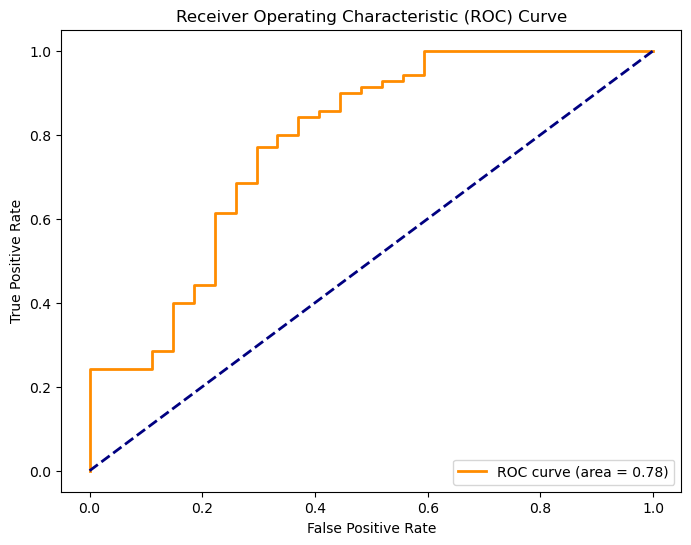

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn import metrics

# Create and train the Logistic Regression model
lr = LogisticRegression(featuresCol='feature', labelCol='Loan_Status')
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Display the first 5 rows of predictions
predictions.show(5)

# Evaluate the model and print the AUC value
auc_evaluator = BinaryClassificationEvaluator().setLabelCol('Loan_Status')
auc_value = auc_evaluator.evaluate(predictions)
print('Area Under the Curve (AUC):', auc_value)

# Convert Spark DataFrame to Pandas DataFrame
predictions_pd = predictions.select('Loan_Status', 'probability').toPandas()

# Extract labels and probabilities from Pandas DataFrame
labels = predictions_pd['Loan_Status']
probs = predictions_pd['probability'].apply(lambda x: x[1])

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(labels, probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve using Pandas and Matplotlib
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Area Under the Curve (AUC): 0.782010582010582


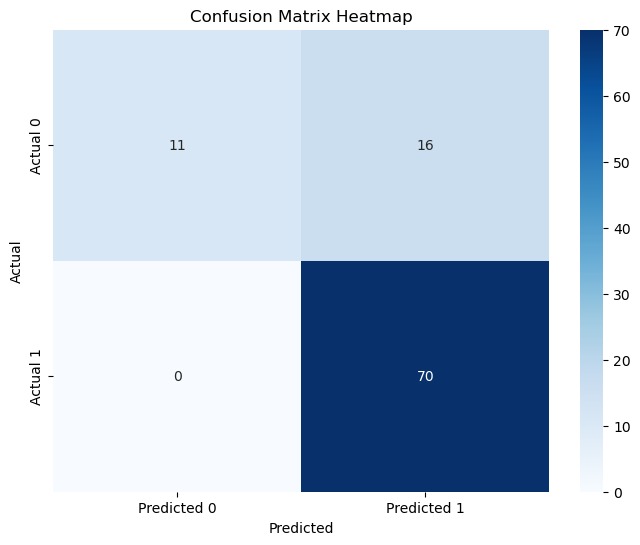

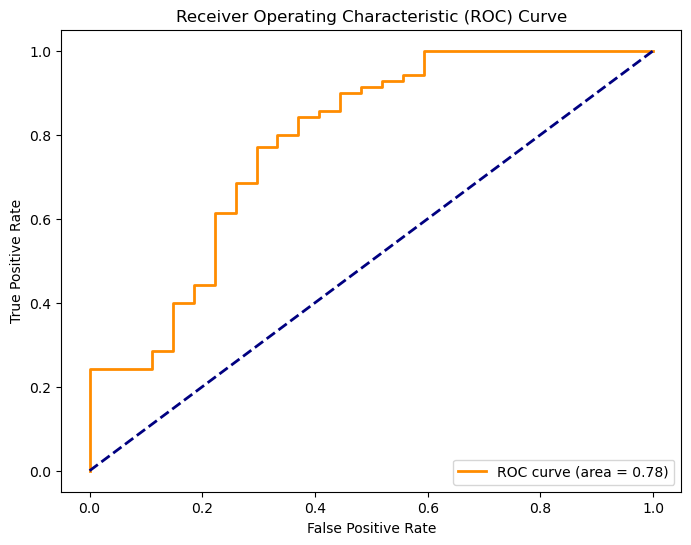

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt

# Create and train the Logistic Regression model
lr = LogisticRegression(featuresCol='feature', labelCol='Loan_Status')
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model and print the AUC value
auc_evaluator = BinaryClassificationEvaluator().setLabelCol('Loan_Status')
auc_value = auc_evaluator.evaluate(predictions)
print('Area Under the Curve (AUC):', auc_value)

# Convert Spark DataFrame to Pandas DataFrame
predictions_pd = predictions.select('Loan_Status', 'prediction').toPandas()

# Get the confusion matrix
conf_matrix = confusion_matrix(predictions_pd['Loan_Status'], predictions_pd['prediction'])

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(predictions_pd['Loan_Status'], predictions.select('probability').toPandas()['probability'].apply(lambda x: x[1]))

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve using Pandas and Matplotlib
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [48]:
rf = RandomForestClassifier(featuresCol='feature', labelCol='Loan_Status')
rf_model = rf.fit(train_data)

In [49]:
predictions = rf_model.transform(test_data)
auc = BinaryClassificationEvaluator().setLabelCol('Loan_Status')
print('AUC:', str(auc.evaluate(predictions)))

AUC: 0.7582010582010582


+--------------------+-----------+--------------------+--------------------+----------+
|             feature|Loan_Status|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|(22,[0,2,4,8,10,1...|          1|[2.59653637610266...|[0.12982681880513...|       1.0|
|(22,[0,2,4,8,10,1...|          1|[2.75812767105558...|[0.13790638355277...|       1.0|
|(22,[0,2,4,8,10,1...|          1|[4.11368276528585...|[0.20568413826429...|       1.0|
|(22,[0,2,4,8,10,1...|          1|[2.79390479715529...|[0.13969523985776...|       1.0|
|(22,[0,2,4,8,10,1...|          1|[3.41358718461916...|[0.17067935923095...|       1.0|
+--------------------+-----------+--------------------+--------------------+----------+
only showing top 5 rows

Area Under the Curve (AUC): 0.7582010582010582


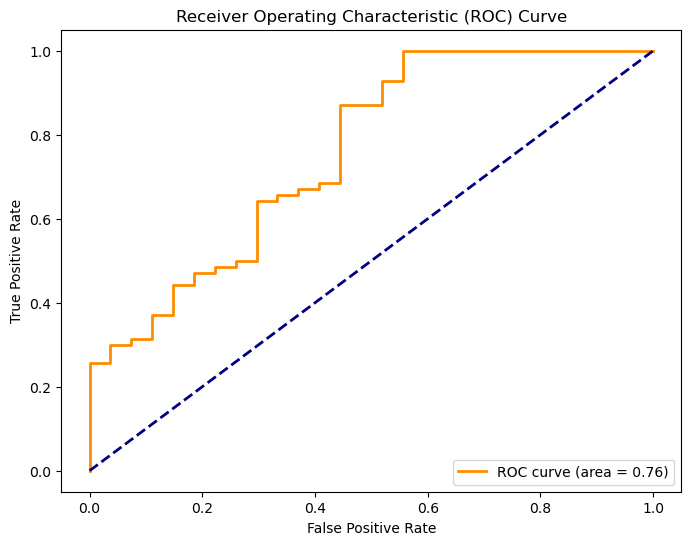

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Assuming train_data and test_data are already defined
# Create and train the Random Forest Classifier
rf = RandomForestClassifier(featuresCol='feature', labelCol='Loan_Status')
rf_model = rf.fit(train_data)

# Make predictions on the test data
predictions = rf_model.transform(test_data)

# Display the first 5 rows of predictions
predictions.show(5)

# Evaluate the model and print the AUC value
auc_evaluator = BinaryClassificationEvaluator().setLabelCol('Loan_Status')
auc_value = auc_evaluator.evaluate(predictions)
print('Area Under the Curve (AUC):', auc_value)

# Convert Spark DataFrame to Pandas DataFrame
predictions_pd = predictions.select('Loan_Status', 'probability').toPandas()

# Extract labels and probabilities from Pandas DataFrame
labels = predictions_pd['Loan_Status']
probs = predictions_pd['probability'].apply(lambda x: x[1])

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(labels, probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve using Pandas and Matplotlib
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Area Under the Curve (AUC): 0.7582010582010582


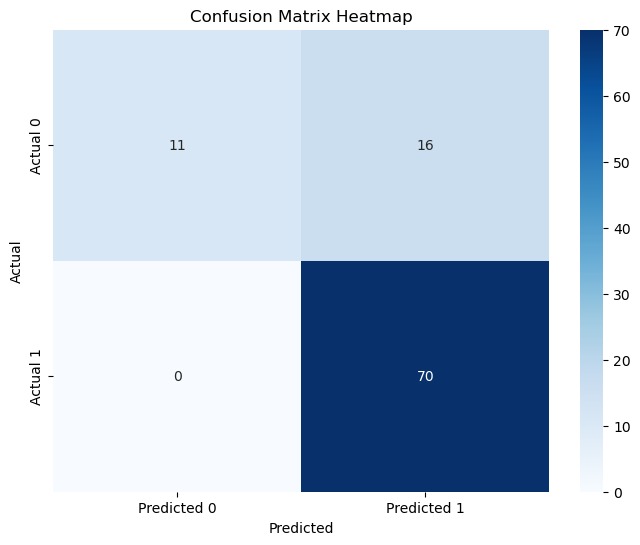

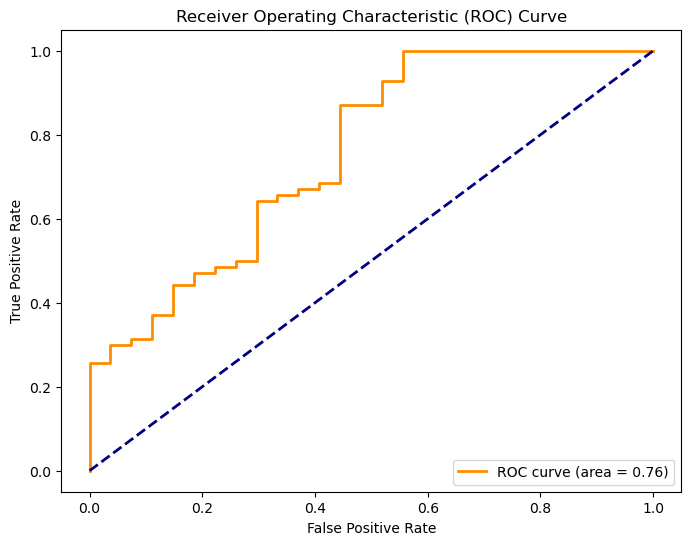

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt

# Assuming train_data and test_data are already defined
# Create and train the Random Forest Classifier
rf = RandomForestClassifier(featuresCol='feature', labelCol='Loan_Status')
rf_model = rf.fit(train_data)

# Make predictions on the test data
predictions = rf_model.transform(test_data)

# Evaluate the model and print the AUC value
auc_evaluator = BinaryClassificationEvaluator().setLabelCol('Loan_Status')
auc_value = auc_evaluator.evaluate(predictions)
print('Area Under the Curve (AUC):', auc_value)

# Convert Spark DataFrame to Pandas DataFrame
predictions_pd = predictions.select('Loan_Status', 'prediction').toPandas()

# Get the confusion matrix
conf_matrix = confusion_matrix(predictions_pd['Loan_Status'], predictions_pd['prediction'])

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(predictions_pd['Loan_Status'], predictions.select('probability').toPandas()['probability'].apply(lambda x: x[1]))

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve using Pandas and Matplotlib
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
